## Project fraud detection

### Objective:
- The objective of this work is to train a classification model that can detect fraud in credit card payments, seeking to provide information, in real time, so that the purchase is not made if a high probability of fraud has been detected.

- O objetivo desse trabalho é treinar um modelo de classificação que possa detectar fraudes no pagamento com cartão de crédito buscando fornecer informações, em tempo real, para que a compra não seja realizada caso tenha detectado alta probabilidade de ser fraude.

### Data Origin:
- Dataset: https://www.kaggle.com/code/elvisacaciobarbosa/detec-o-de-fraude-no-cart-o-de-cr-dito/input

- The dataset used is purchase transaction data collected from a card issuer. The dataset contains over 
280,000 transactions, each containing 31 features that describe the nature of the transactions.

- O conjunto de dados utilizados são dados de transações de compras coletados de uma administradora de cartão. O conjunto de dados contém mais de 280.000 transações, cada uma contendo 31 características que descreverão a natureza das transações.

- Aqui está o que as colunas representam: (os valores de V1 A V28 não foram revelados pela administradora)

Time = tempo da primeira transação até a atual

V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28

Amount = valor da transaçao

Class = indica fraude-1 ou integridade-0

- ## Análise exploratória dos dados
- ## Preparação dos dados
- ## Armazenamento dos dados tratados

In [1]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning

In [2]:
# preparação e visualização de dados
from sklearn.compose import ColumnTransformer # Aplica transformadores a colunas de um array ou pandas DataFrame

from sklearn.preprocessing import OrdinalEncoder # convertendo dados categoricos em numerico (categoria sequencial)
from sklearn.preprocessing import OneHotEncoder # convertendo dados categoricos em numerico (categoria - coluna)

from matplotlib import pyplot # plotagem gráfica
import seaborn as sns # plotagem gráfica baseada em matplotlib
import numpy as np # computação de matrizes

In [3]:
# carregando arquivo de dados
df_fraud = pd.read_csv('dataset/creditcard.csv', sep=',')

In [4]:
# verificando a quantidade de linhas e colunas do dataframe
df_fraud.shape

(284807, 31)

In [5]:
# reconhecendo as primeiras linhas do dataframe
df_fraud.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
# reconhecendo as variáveis disponíveis
# verificando se há dados nulos
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- Observando que a quantidade de linhas sem nulos é o mesmo da quantidade total de linhas do dataframe, portanto até esse momento não há nulos.

In [7]:
# confirmando a inexistência de nulos
df_fraud.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- Confirmando, através da função isnull(), que não existe nenhum nulo nas linhas do dataframe.

In [8]:
# verificando se existe registros duplicados
df_fraud.duplicated().sum()

1081

In [9]:
# eliminando registros duplicados
df_fraud = df_fraud.drop_duplicates()

In [10]:
# verificando quantas linhas restaram
df_fraud.shape

(283726, 31)

In [11]:
# verificando o conteudo de cada coluna (variável) do dataframe
df_fraud.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


- Observamos que não temos a variável categóricas sendo as demais algumas contínuas e discretas.
- Nossa variável target (alvo) será a Class que identifica se houve fraude ou não (0-não 1-sim)

In [12]:
# listando a relação de colunas
list(df_fraud.columns)

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

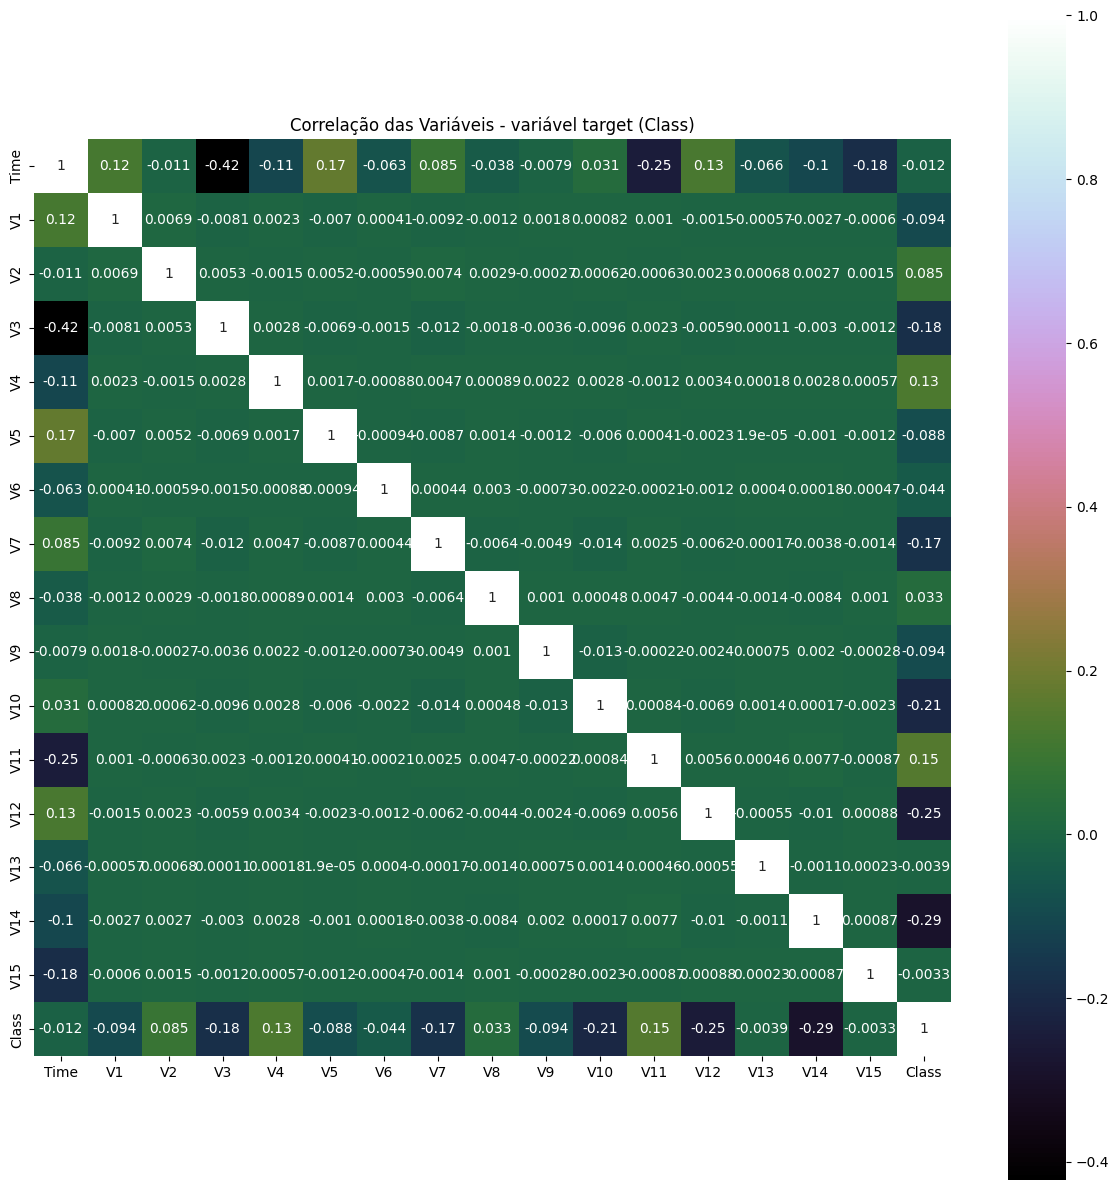

In [13]:
# analisando a correlação entre as variáveis
lista_corr = list(['Time',
                    'V1',
                    'V2',
                    'V3',
                    'V4',
                    'V5',
                    'V6',
                    'V7',
                    'V8',
                    'V9',
                    'V10',
                    'V11',
                    'V12',
                    'V13',
                    'V14',
                    'V15', 'Class'])

fig, axs = pyplot.subplots(nrows=1, ncols=1, figsize=(12,12))

correlation = df_fraud[lista_corr].corr()
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix', ax=axs)

axs.set_title('Correlação das Variáveis - variável target (Class)')
fig.tight_layout()

pyplot.show()

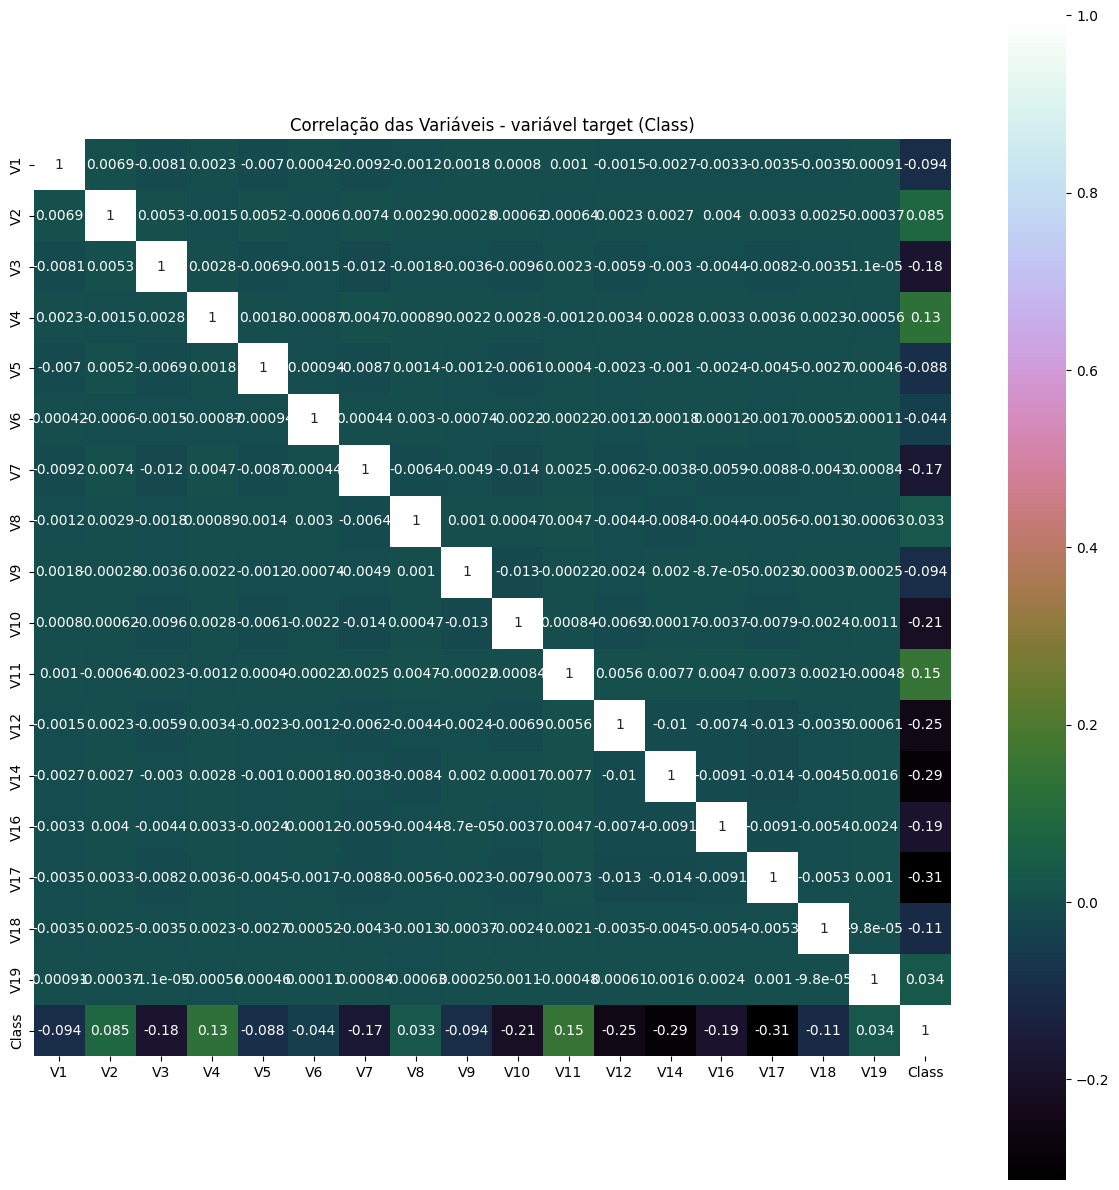

In [24]:
# analisando a correlação entre as variáveis
lista_corr2 = list[ 'V16',
                    'V17',
                    'V18',
                    'V19',
                    'V20',
                    'V21',
                    'V22',
                    'V23',
                    'V24',
                    'V25',
                    'V26',
                    'V27',
                    'V28',
                    'Amount', 'Class']

fig, axs = pyplot.subplots(nrows=1, ncols=1, figsize=(12,12))

correlation = df_fraud[lista_corr2].corr()
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix', ax=axs)

axs.set_title('Correlação das Variáveis - variável target (Class)')
fig.tight_layout()

pyplot.show()

- As colunas que apresentaram um correlação menor que 3% serão descartadas são elas: Time, V13, V15, V20, V21, V22, V23, V24, V25, V26, V27, V28 e Amount. As demais colunas serão mantidas para treinarmos o modelo de classificação proposto para esse projeto.

In [ ]:
# separando somente as colunas com correlaçao >= 3%
df_fraud = df_fraud[['V1',
                    'V2',
                    'V3',
                    'V4',
                    'V5',
                    'V6',
                    'V7',
                    'V8',
                    'V9',
                    'V10',
                    'V11',
                    'V12',
                    'V14',
                    'V16',
                    'V17',
                    'V18',
                    'V19',
                    'Class']]

In [16]:
# verificando as colunas do dataframe
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      283726 non-null  float64
 1   V2      283726 non-null  float64
 2   V3      283726 non-null  float64
 3   V4      283726 non-null  float64
 4   V5      283726 non-null  float64
 5   V6      283726 non-null  float64
 6   V7      283726 non-null  float64
 7   V8      283726 non-null  float64
 8   V9      283726 non-null  float64
 9   V10     283726 non-null  float64
 10  V11     283726 non-null  float64
 11  V12     283726 non-null  float64
 12  V14     283726 non-null  float64
 13  V16     283726 non-null  float64
 14  V17     283726 non-null  float64
 15  V18     283726 non-null  float64
 16  V19     283726 non-null  float64
 17  Class   283726 non-null  int64  
dtypes: float64(17), int64(1)
memory usage: 41.1 MB


In [17]:
# verificando os dados
df_fraud.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0


In [18]:
# reduzindo as casas decimais
df_fraud['V1'] = round(df_fraud['V1'], 2)
df_fraud['V2'] = round(df_fraud['V2'], 2)
df_fraud['V3'] = round(df_fraud['V3'], 2)
df_fraud['V4'] = round(df_fraud['V4'], 2)
df_fraud['V5'] = round(df_fraud['V5'], 2)
df_fraud['V6'] = round(df_fraud['V6'], 2)
df_fraud['V7'] = round(df_fraud['V7'], 2)
df_fraud['V8'] = round(df_fraud['V8'], 2)
df_fraud['V9'] = round(df_fraud['V9'], 2)
df_fraud['V10'] = round(df_fraud['V10'], 2)
df_fraud['V11'] = round(df_fraud['V11'], 2)
df_fraud['V12'] = round(df_fraud['V12'], 2)
df_fraud['V14'] = round(df_fraud['V14'], 2)
df_fraud['V16'] = round(df_fraud['V16'], 2)
df_fraud['V17'] = round(df_fraud['V17'], 2)
df_fraud['V18'] = round(df_fraud['V18'], 2)
df_fraud['V19'] = round(df_fraud['V19'], 2)

In [19]:
# verificando os valores corrigidos do df
df_fraud.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,Class
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0.03,0.40,0
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,-0.14,0.46,-0.11,-0.18,-0.15,0
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,-0.17,-2.89,1.11,-0.12,-2.26,0


In [20]:
# analisando as estatísticas básicas de cada variável
df_fraud[list(df_fraud.columns)].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.005925,-0.004136,0.001608,-0.002968,0.001829,-0.001141,0.001802,-0.000861,-0.001594,-0.001445,0.000194,-0.000724,0.000256,0.001157,0.000180,0.001510,-0.000272,0.001667
std,1.948026,1.646713,1.508681,1.414189,1.377023,1.331925,1.227666,1.179060,1.095482,1.076407,1.018725,0.994679,0.952226,0.873703,0.842507,0.837381,0.813375,0.040796
min,-56.410000,-72.720000,-48.330000,-5.680000,-113.740000,-26.160000,-43.560000,-73.220000,-13.430000,-24.590000,-4.800000,-18.680000,-19.210000,-14.130000,-25.160000,-9.500000,-7.210000,0.000000
25%,-0.920000,-0.600000,-0.890000,-0.850000,-0.690000,-0.770000,-0.550000,-0.210000,-0.640000,-0.540000,-0.760000,-0.410000,-0.430000,-0.470000,-0.480000,-0.500000,-0.460000,0.000000
50%,0.020000,0.060000,0.180000,-0.020000,-0.050000,-0.280000,0.040000,0.020000,-0.050000,-0.090000,-0.030000,0.140000,0.050000,0.070000,-0.070000,0.000000,0.000000,0.000000
75%,1.320000,0.800000,1.030000,0.740000,0.610000,0.400000,0.570000,0.330000,0.600000,0.450000,0.740000,0.620000,0.490000,0.520000,0.400000,0.500000,0.460000,0.000000
max,2.450000,22.060000,9.380000,16.880000,34.800000,73.300000,120.590000,20.010000,15.590000,23.750000,12.020000,7.850000,10.530000,17.320000,9.250000,5.040000,5.590000,1.000000


In [21]:
# verificando quantos registros restaram
df_fraud.shape

(283726, 18)

In [22]:
# salva os dados tratados em arquivo csv organizado pelo índice
df_fraud.sort_index().to_csv('df_treated/df_fraud.csv', index=False)